In [8]:
!pip install gensim sklearn matplotlib


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



🔍 Similar words to 'learning':
future: 0.2190
to: 0.2167
neural: 0.1961
are: 0.1527
python: 0.1419


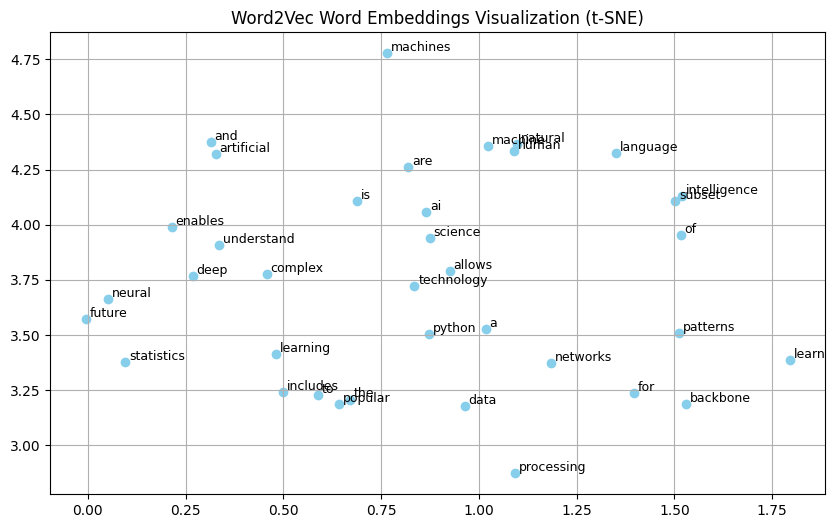

In [7]:
# --------------------------------------------
# Lab Assignment 6: Word2Vec with Gensim
# --------------------------------------------

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

# Download tokenizer
nltk.download('punkt')

# --------------------------------------------
# Step 1: Define a small text corpus
# --------------------------------------------
corpus = [
    "Artificial intelligence is the future of technology",
    "Machine learning is a subset of artificial intelligence",
    "Deep learning allows machines to learn complex patterns",
    "Natural language processing enables machines to understand human language",
    "Neural networks are the backbone of deep learning",
    "Data science includes statistics and machine learning",
    "Python is a popular language for AI and data science",
]

# Tokenize the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# --------------------------------------------
# Step 2: Train a Word2Vec model
# --------------------------------------------
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=3, min_count=1, workers=2, sg=1)

# --------------------------------------------
# Step 3: Find similar words using cosine similarity
# --------------------------------------------
print("\n🔍 Similar words to 'learning':")
similar_words = model.wv.most_similar('learning', topn=5)
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

# --------------------------------------------
# Step 4: Visualize embeddings using t-SNE
# --------------------------------------------
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='skyblue')

for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0]+0.01, word_vectors_2d[i, 1]+0.01, word, fontsize=9)

plt.title("Word2Vec Word Embeddings Visualization (t-SNE)")
plt.grid(True)
plt.show()
